# **Hands On Graph Neural Networks Using Python  -  CHAPTER 2**

- This code provides functionality for graph visualization and analysis using NetworkX and Matplotlib.

- The GraphVisualizer class includes methods to set a graph, draw a basic graph, and draw a weighted graph with edge labels.

- The GraphAnalyzer class offers static methods to check graph connectivity and print centrality measures `(degree, closeness, and betweenness centrality)`.

- The SimpleGraphOperations class provides static methods to perform breadth-first search `(BFS)` and depth-first search `(DFS)` on a graph.

- Several types of graphs are defined: an undirected simple graph, a directed graph, and a weighted graph. The graphs are visualized using the GraphVisualizer class.

- Connectivity of two example graphs is checked using the GraphAnalyzer class.

- Centrality measures for the simple graph are printed.

- BFS and DFS traversals are performed on the simple graph, and their results are printed.

- Adjacency matrix and adjacency list representations of a graph are also demonstrated.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

### **GraphVisualizer Class**

 This class provides methods for visualizing graphs using NetworkX and Matplotlib.
 It includes the following methods:
 - __init__: Initializes the graph to None.

 - set_graph: Sets the graph to be visualized.

 - draw_graph: Draws the graph using a specified layout (default is 'spring'), with customizable node size, color map, font size, and font color.

 - draw_weighted_graph: Draws the graph with edge labels showing weights.

In [ ]:
class GraphVisualizer:
    def __init__(self):
        self.graph = None

    def set_graph(self, graph):
        self.graph = graph

    def draw_graph(self, layout='spring', node_size=600, cmap='coolwarm', font_size=14, font_color='white'):
        if self.graph is None:
            raise ValueError("Graph not set")

        plt.figure(figsize=(8, 6))
        plt.axis('off')
        pos = getattr(nx, f'{layout}_layout')(self.graph, seed=0)
        nx.draw_networkx(self.graph, pos=pos, node_size=node_size, cmap=cmap, font_size=font_size, font_color=font_color)
        plt.show()

    def draw_weighted_graph(self, weight_attr='weight'):
        if self.graph is None:
            raise ValueError("Graph not set")

        plt.figure(figsize=(8, 6))
        plt.axis('off')
        pos = nx.spring_layout(self.graph, seed=0)
        nx.draw_networkx(self.graph, pos=pos, node_size=600, cmap='coolwarm', font_size=14, font_color='white')
        labels = nx.get_edge_attributes(self.graph, weight_attr)
        nx.draw_networkx_edge_labels(self.graph, pos=pos, edge_labels=labels)
        plt.show()


### **GraphAnalyzer Class**

This class provides static methods for analyzing graphs using NetworkX.
It includes the following methods:

 - check_connectivity: Checks if the graph is connected and returns a boolean value.

 - print_centrality_measures: Prints various centrality measures of the graph, including degree centrality, closeness centrality, and betweenness centrality.

In [ ]:
class GraphAnalyzer:
    @staticmethod
    def check_connectivity(graph):
        return nx.is_connected(graph)

    @staticmethod
    def print_centrality_measures(graph):
        print(f"Degree centrality = {nx.degree_centrality(graph)}")
        print(f"Closeness centrality = {nx.closeness_centrality(graph)}")
        print(f"Betweenness centrality = {nx.betweenness_centrality(graph)}")


### **SimpleGraphOperations Class**

This class provides static methods for performing basic graph operations.
It includes the following methods:

 - bfs: Performs breadth-first search `(BFS)` on the graph starting from a specified node and returns the list of visited nodes.

 - dfs: Performs depth-first search `(DFS)` on the graph starting from a specified node and returns the list of visited nodes.

In [ ]:
class SimpleGraphOperations:
    @staticmethod
    def bfs(graph, start_node):
        visited, queue = [start_node], [start_node]
        while queue:
            node = queue.pop(0)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    visited.append(neighbor)
                    queue.append(neighbor)
        return visited

    @staticmethod
    def dfs(graph, start_node):
        visited = []
        def _dfs(node):
            if node not in visited:
                visited.append(node)
                for neighbor in graph.neighbors(node):
                    _dfs(neighbor)
        _dfs(start_node)
        return visited

### **Define Graphs**

This section defines three types of graphs using NetworkX:

 - simple_graph: An undirected graph with edges between nodes A, B, C, D, E, F, and G.

 - directed_graph: A directed graph with the same edges as simple_graph but with direction.

 - weighted_graph: An undirected graph with edges having associated weights.

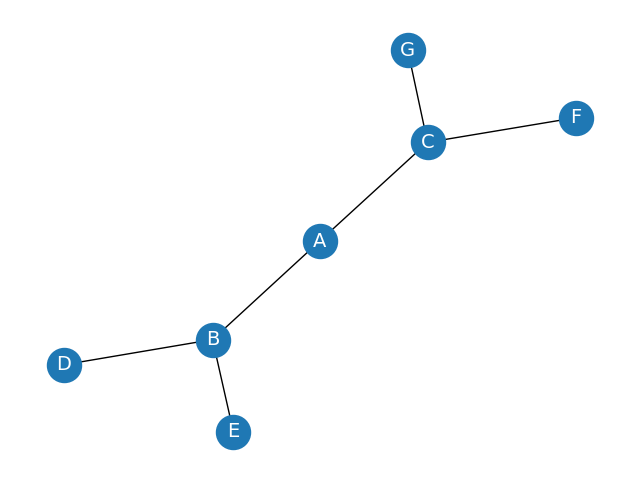

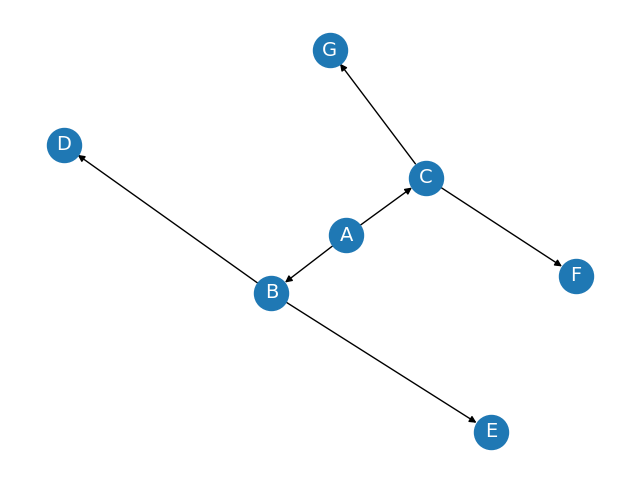

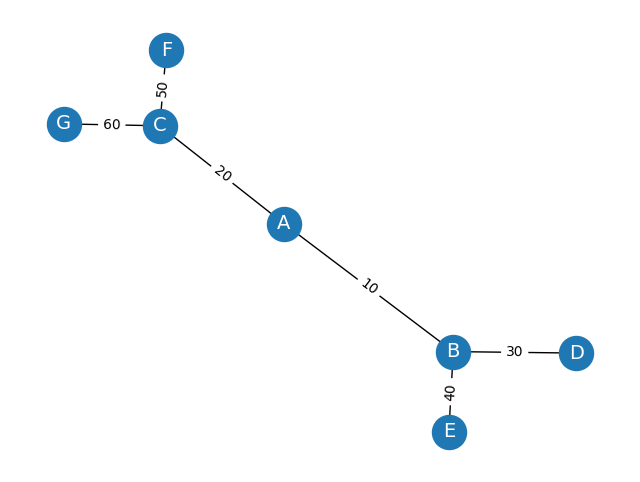

In [ ]:
# Define graphs
simple_graph = nx.Graph()
simple_graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
directed_graph = nx.DiGraph()
directed_graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
weighted_graph = nx.Graph()
weighted_graph.add_edges_from([
    ('A', 'B', {"weight": 10}),
    ('A', 'C', {"weight": 20}),
    ('B', 'D', {"weight": 30}),
    ('B', 'E', {"weight": 40}),
    ('C', 'F', {"weight": 50}),
    ('C', 'G', {"weight": 60})
])

# Create visualizer and analyzer instances
visualizer = GraphVisualizer()
analyzer = GraphAnalyzer()

# Visualize and analyze simple graph
visualizer.set_graph(simple_graph)
visualizer.draw_graph(layout='spring')
visualizer.set_graph(directed_graph)
visualizer.draw_graph(layout='spring')
visualizer.set_graph(weighted_graph)
visualizer.draw_weighted_graph()


In [ ]:
# Check connectivity of simple graphs
graph1 = nx.Graph()
graph1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
print(f"---> Is Graph 1 connected? {analyzer.check_connectivity(graph1)}")

graph2 = nx.Graph()
graph2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
print(f"----> Is Graph 2 connected? {analyzer.check_connectivity(graph2)}")


---> Is Graph 1 connected? False
----> Is Graph 2 connected? True


In [ ]:
# Print centrality measures for the simple graph
print("Centrality Measures:")
analyzer.print_centrality_measures(simple_graph)

# Perform BFS and DFS
print("\n\nBFS Traversal:", SimpleGraphOperations.bfs(simple_graph, 'A'))
print("\nDFS Traversal:", SimpleGraphOperations.dfs(simple_graph, 'A'))


Centrality Measures:
Degree centrality = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness centrality = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness centrality = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}
*******************************************************************


BFS Traversal: ['A', 'B', 'C', 'D', 'E', 'F', 'G']

DFS Traversal: ['A', 'B', 'D', 'E', 'C', 'F', 'G']


### **Adjacency Matrix and Adjacency List Examples**

This section demonstrates the adjacency matrix and adjacency list representations of a graph.


In [ ]:
# Adjacency matrix and adjacency list examples
adj_matrix = [
    [0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 0],
    [1, 0, 0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0]
]

adj_list = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5, 6],
    3: [1],
    4: [1],
    5: [2],
    6: [2]
}

print("Adjacency Matrix:")
for row in adj_matrix:
    print(row)

print("\nAdjacency List:")
for key, value in adj_list.items():
    print(f"{key}: {value}")

Adjacency Matrix:
[0, 1, 1, 0, 0, 0, 0]
[1, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 0, 0, 1, 1]
[0, 1, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0]

Adjacency List:
0: [1, 2]
1: [0, 3, 4]
2: [0, 5, 6]
3: [1]
4: [1]
5: [2]
6: [2]
